In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download("all")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
df = pd.read_csv("FDSWORK3800.csv")
# df["Target"] = df["label"].apply(lambda x : 1 if (x.lower() == "positive") else ( -1 if (x.lower() =="negative") else 0  ))
# df = df.drop("label",axis = 1)
# df = df.dropna(inplace=True)
df["label"].fillna("positive",inplace = True)
df["USER NAME"].fillna("TopG",inplace = True)
df["COMMENT"].fillna(" " ,inplace=True)
print(df.isnull().sum()) # Ensure all values are strings
df["label"] = df["label"].str.strip().str.lower()
df["Target"] = df["label"].apply(lambda x: 1 if x.lower().replace(" ","") == ("positive")  else (-1 if x.lower().replace(" ","") == "negative" else 0)) #removed the spaces at front and back using strip




SL           0
USER NAME    0
COMMENT      0
label        0
Website      0
dtype: int64


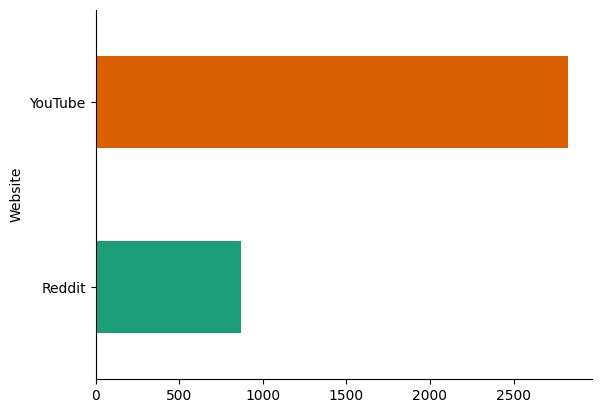

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Website').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def processText(text):
  #tokenize text
  tokens = word_tokenize(text.lower())
  #remove stop words
  filtered_tokens = [token for token in tokens if token not in stopwords.words("english")]
  #lemmatize tokens
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
  # Join the tokens back into a string
  processed_text = ' '.join(lemmatized_tokens)
  return processed_text
# apply the function df
df['COMMENT'] = df['COMMENT'].apply(processText)
df

,SL,USER NAME,COMMENT,label,Website,Target
0,1,@edgarom1606,worst opening history . running twisted people...,negative,YouTube,-1
1,2,@JM-bo7ko,garbage france embarrassed show . nothing tick...,negative,YouTube,-1
2,3,@lucindar.8163,"olympics sporting event . religion , politics ...",negative,YouTube,-1
3,4,@NoRiceToEat,hindu found disgusting watch .,negative,YouTube,-1
4,5,@IMCASSOC,france ashamed . embarrassment . absolutely te...,negative,YouTube,-1
...,...,...,...,...,...,...
3692,3693,@buddhiprakashjaipurpinkcit4774,congratulation,positive,YouTube,1
3693,3694,@ItShivm,congratulation,positive,YouTube,1
3694,3695,@firefromyourashley,shoutout jana raspal,positive,YouTube,1
3695,3696,@nursinghome1819,jai shri ram,positive,YouTube,1


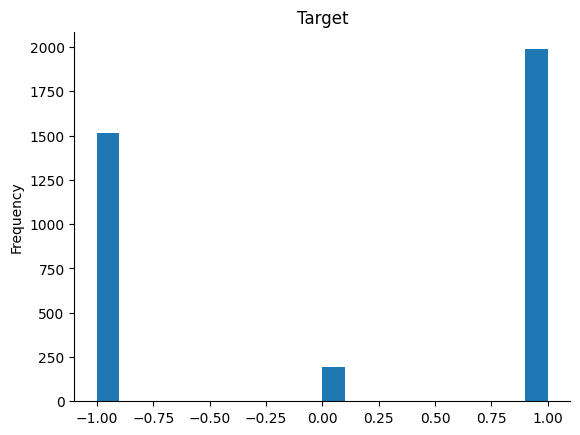

In [ ]:
# @title Target

from matplotlib import pyplot as plt
df['Target'].plot(kind='hist', bins=20, title='Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Define get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    # Map compound score to 0, 1, -1
    if compound >= 0.05:
        sentiment = 1  # Positive
    elif compound <= -0.05:
        sentiment = -1  # Negative
    else:
        sentiment = 0  # Neutral
    return sentiment

# Apply the get_sentiment function to the dataframe
df["Sentiment"] = df["COMMENT"].apply(get_sentiment)
df


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,SL,USER NAME,COMMENT,label,Website,Target,Sentiment
0,1,@edgarom1606,worst opening history . running twisted people...,negative,YouTube,-1,-1
1,2,@JM-bo7ko,garbage france embarrassed show . nothing tick...,negative,YouTube,-1,0
2,3,@lucindar.8163,"olympics sporting event . religion , politics ...",negative,YouTube,-1,0
3,4,@NoRiceToEat,hindu found disgusting watch .,negative,YouTube,-1,-1
4,5,@IMCASSOC,france ashamed . embarrassment . absolutely te...,negative,YouTube,-1,-1
...,...,...,...,...,...,...,...
3692,3693,@buddhiprakashjaipurpinkcit4774,congratulation,positive,YouTube,1,1
3693,3694,@ItShivm,congratulation,positive,YouTube,1,1
3694,3695,@firefromyourashley,shoutout jana raspal,positive,YouTube,1,0
3695,3696,@nursinghome1819,jai shri ram,positive,YouTube,1,0


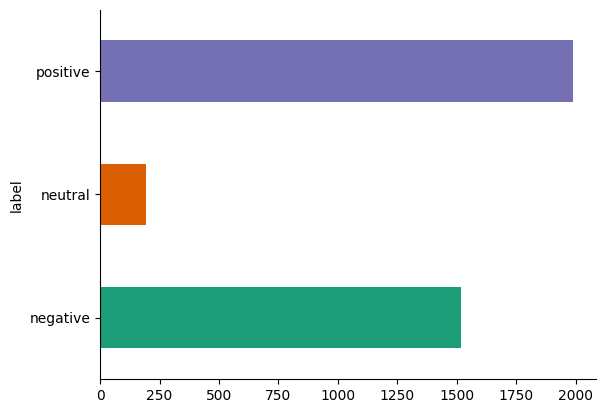

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df["Target"],df["Sentiment"]))
print(classification_report(df["Target"],df["Sentiment"]))

[[ 736  326  454]
 [  21   68  105]
 [  81  356 1550]]
              precision    recall  f1-score   support

          -1       0.88      0.49      0.63      1516
           0       0.09      0.35      0.14       194
           1       0.73      0.78      0.76      1987

    accuracy                           0.64      3697
   macro avg       0.57      0.54      0.51      3697
weighted avg       0.76      0.64      0.67      3697



<Axes: xlabel='Count', ylabel='Sentiment'>

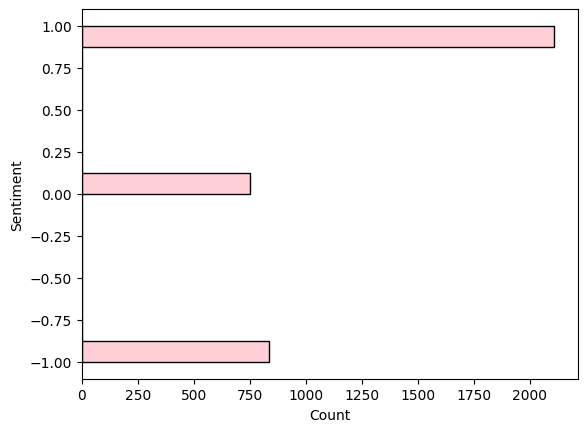

In [ ]:
import seaborn as sns
sns.histplot(data = df , y = "Sentiment",color="pink",)

STEP 1

PART 3 CODE

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
# Load sentiment data from CSV file
# Replace 'path_to_your_data.csv' with the path to your CSV file
# Replace 'sentiment_column' with the name of the column containing sentiment scores
#df = pd.read_csv('path_to_your_data.csv')
sentiment_scores = df['Sentiment'].values
# Replace 'sentiment_column' with your actual column name
# Define your benchmark value
benchmark_value = 0.0 # Example benchmark, use this
# Perform the one-sample t-test
mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1) # Sample standard deviation
n = len(sentiment_scores)

STEP 2

Shapiro-Wilk Test Statistic: 0.7091, P-Value: 0.0000
Data is not normally distributed (Reject H0).


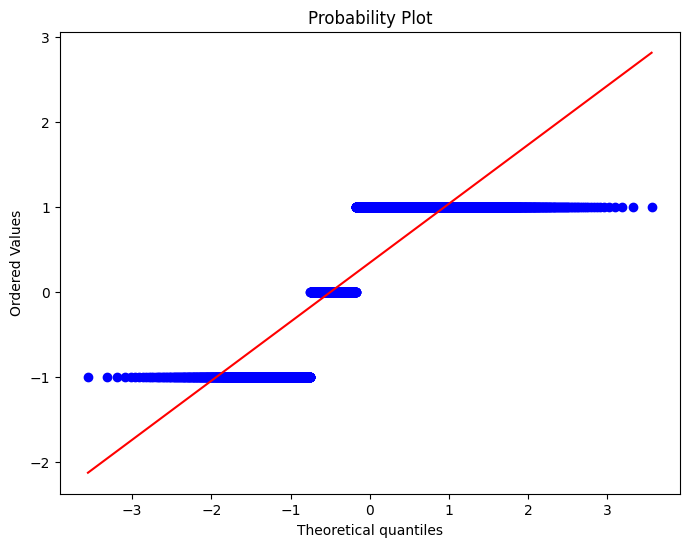

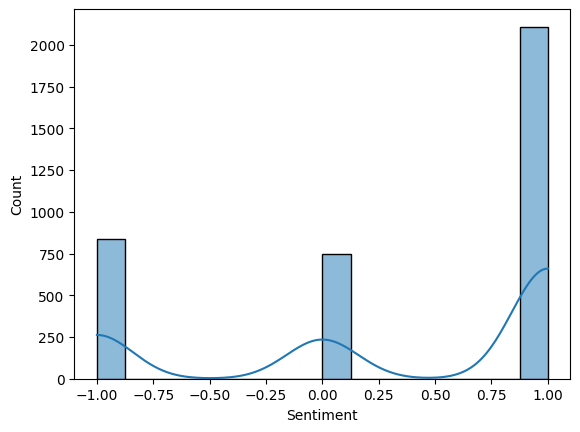

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Assuming you have your sentiment scores in a Pandas DataFrame
sentiment_scores = df['Sentiment']
# Shapiro-Wilk Test
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
 print("Data is normally distributed (Fail to reject H0).")
else:
 print("Data is not normally distributed (Reject H0).")
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.show()
# Histogram
sns.histplot(sentiment_scores, kde=True)
plt.show()


STEP 3

In [ ]:
from scipy.stats import levene
# Assuming you have sentiment scores grouped by database
grouped_sentiments = [group['Sentiment'] for name, group in df.groupby('Website')]
# Levene's Test for equal variances
stat, p_value = levene(*grouped_sentiments)
print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
 print("Variances are equal (Fail to reject H0).")
else:
 print("Variances are not equal (Reject H0).")

Levene's Test Statistic: 109.3056, P-Value: 0.0000
Variances are not equal (Reject H0).


STEP 4

In [ ]:
# If data is normally distributed and variances are equal, perform ANOVA
from scipy.stats import kruskal
if p_value > 0.05 and shapiro(sentiment_scores)[1] > 0.05:
 f_statistic, anova_p_value = f_oneway(*grouped_sentiments)
 print(f"ANOVA F-Statistic: {f_statistic:.4f}, P-Value: {anova_p_value:.4f}")
 if anova_p_value < 0.05:
  print("Reject the null hypothesis: There is a significant difference betweenthe groups.")
 else:
  print("Fail to reject the null hypothesis: No significant difference betweenthe groups.")
else:
 # If data is not normally distributed or variances are not equal, perform KruskalWallis H Test
 h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
 print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value:{kruskal_p_value:.4f}")
 if kruskal_p_value < 0.05:
  print("Reject the null hypothesis: There is a significant difference between the groups.")
 else:
  print("Fail to reject the null hypothesis: No significant difference between the groups.")

Kruskal-Wallis H Statistic: 102.0962, P-Value:0.0000
Reject the null hypothesis: There is a significant difference between the groups.


Pearson Correlation between Sentiment and Comment Length: 0.0103,P-Value: 0.5318
Spearman Correlation between Sentiment and Comment Length:0.0320, P-Value: 0.0519


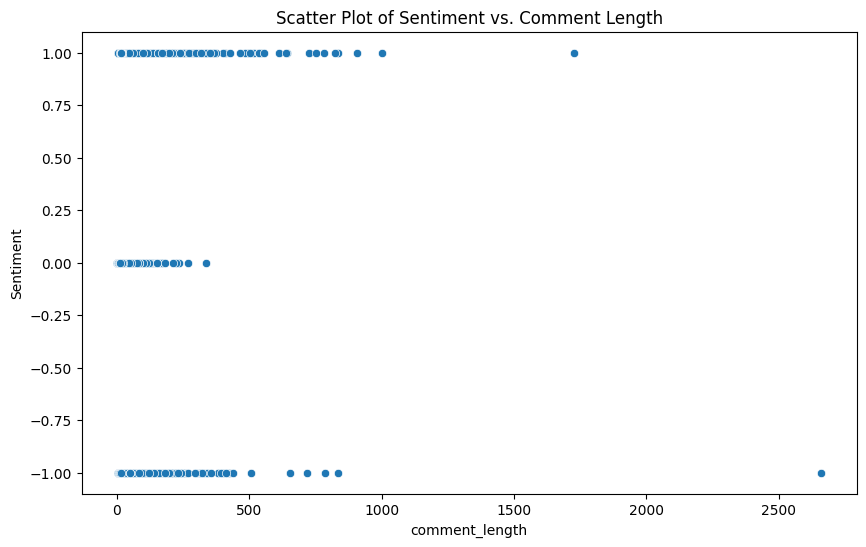

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
# Load your data
# df = pd.read_csv('path_to_your_data.csv')
# Create additional variables if needed
# For example, calculate the comment length if it's not already in your data
df['comment_length'] = df['COMMENT'].apply(len)
# If you have a timestamp or timing information, ensure it's in a datetime format
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# Checking correlations between sentiment and comment length
pearson_corr, pearson_p_value = pearsonr(df['Sentiment'], df['comment_length'])
spearman_corr, spearman_p_value = spearmanr(df['Sentiment'], df['comment_length'])
print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f},P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment and Comment Length:{spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")
# Visualizing the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df)
plt.title('Scatter Plot of Sentiment vs. Comment Length')
plt.show()
# If you have timing information, you could create a variable like time of day or dayof week
# df['hour'] = df['timestamp'].dt.hour
# df['day_of_week'] = df['timestamp'].dt.dayofweek
# Checking correlations between sentiment and timing (if applicable)
# pearson_corr_time, pearson_p_value_time = pearsonr(df['sentiment'], df['hour'])
# spearman_corr_time, spearman_p_value_time = spearmanr(df['sentiment'], df['hour'])
# print(f"Pearson Correlation between Sentiment and Hour of Day:{pearson_corr_time:.4f}, P-Value: {pearson_p_value_time:.4f}")
# print(f"Spearman Correlation between Sentiment and Hour of Day:{spearman_corr_time:.4f}, P-Value: {spearman_p_value_time:.4f}")
# Visualizing correlation with timing (if applicable)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='hour', y='sentiment', data=df)
# plt.title('Scatter Plot of Sentiment vs. Hour of Day')
# plt.show()

***FDS PART 4 ***

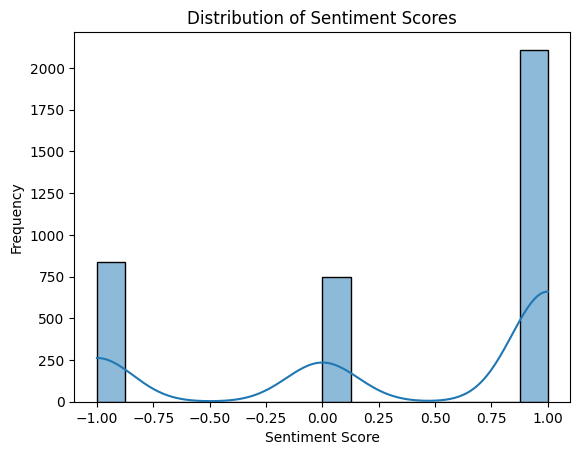

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.tsa.seasonal import seasonal_decompose
from wordcloud import WordCloud
# Load your CSV file
# df = pd.read_csv('FDSWORK3800.csv')
# Basic Preprocessing
# Ensure that 'timestamp' is in datetime format if it exists
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# Create additional features (e.g., comment length)
df['comment_length'] = df['COMMENT'].apply(len)
# --- Time Series Analysis ---
# If you have timestamp data, you can decompose the sentiment time series
if 'timestamp' in df.columns:
 df.set_index('timestamp', inplace=True)
 result = seasonal_decompose(df['Sentiment'], model='additive', period=30)
# Adjust period based on your data
 result.plot()
 plt.show()
# --- Sentiment Distribution Analysis ---
sns.histplot(df['Sentiment'], kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


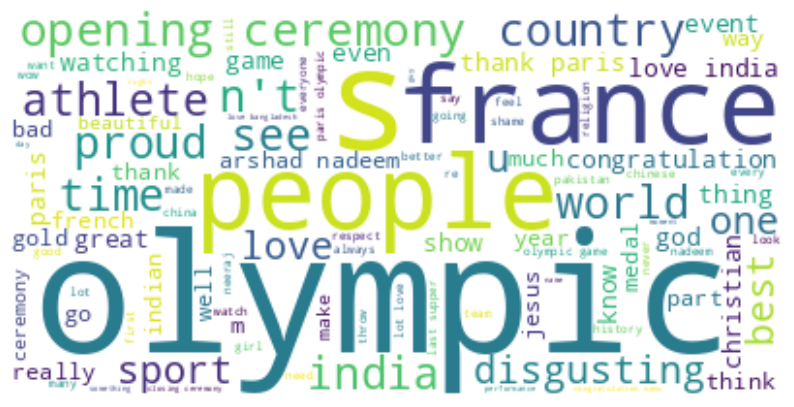

In [ ]:
# --- Word Cloud for Comment Analysis ---
text = " ".join(comment for comment in df['COMMENT'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Linear Regression - Mean Squared Error: 0.7177
Decision Tree - Mean Squared Error: 0.7756
Support Vector Machine - Mean Squared Error: 1.0548
Random Forest - Mean Squared Error: 0.7458
XGBoost - Mean Squared Error: 0.7299


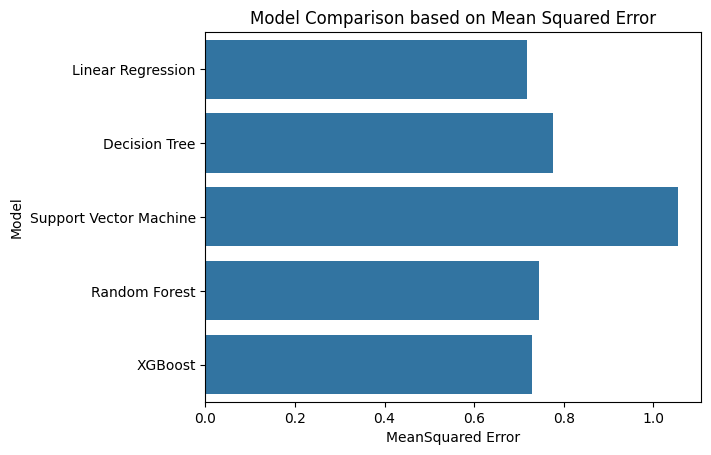

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
# Load your CSV file
# df = pd.read_csv('path_to_your_file.csv')
# Basic Preprocessing
# Ensure that 'timestamp' is in datetime format if it exists
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# Create additional features (e.g., comment length)
# df['comment_length'] = df[''].apply(len)
# Select features and target
X = df[['comment_length']] # Add other relevant features if available
y = df['Sentiment']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Initialize models
models = {
 'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'Support Vector Machine': SVR(),
 'Random Forest': RandomForestRegressor(random_state=42),
 'XGBoost': xgb.XGBRegressor(objective='reg:squarederror',random_state=42)
}
# Train, predict, and evaluate each model
results = {}
for name, model in models.items():
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 mse = mean_squared_error(y_test, y_pred)
 results[name] = mse
 print(f'{name} - Mean Squared Error: {mse:.4f}')
# Compare the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'MeanSquared Error'])
sns.barplot(x='MeanSquared Error', y='Model', data=results_df)
plt.title("Model Comparison based on Mean Squared Error")
plt.show()


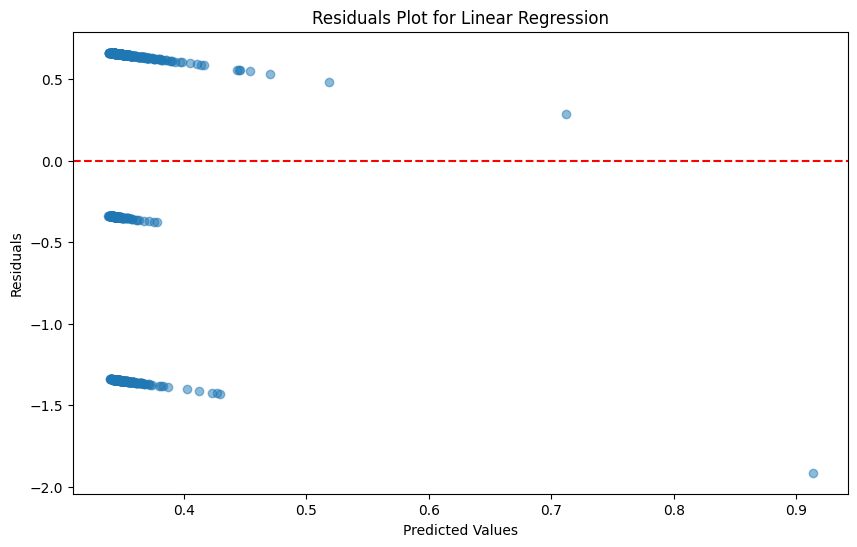

In [ ]:
# Plot residuals for the best-performing model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
# Predict and calculate residuals
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot for {best_model_name}')
plt.show()


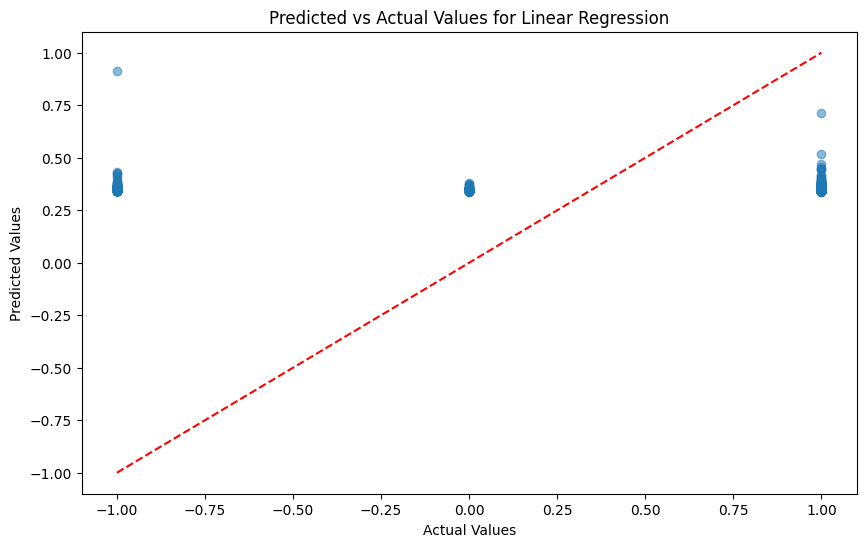

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual Values for {best_model_name}')
plt.show()


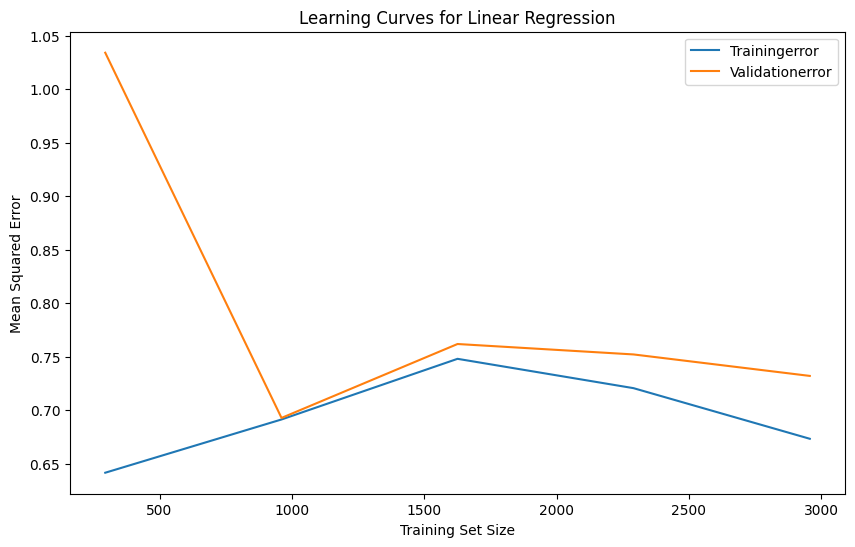

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y,
cv=5, scoring='neg_mean_squared_error')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Trainingerror')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validationerror')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title(f'Learning Curves for {best_model_name}')
plt.legend()
plt.show()


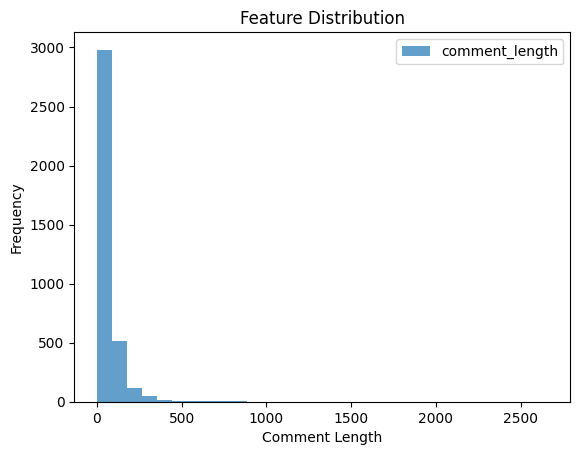

In [ ]:
df[['comment_length']].plot(kind='hist', bins=30, alpha=0.7)
plt.xlabel('Comment Length')
plt.title('Feature Distribution')
plt.show()

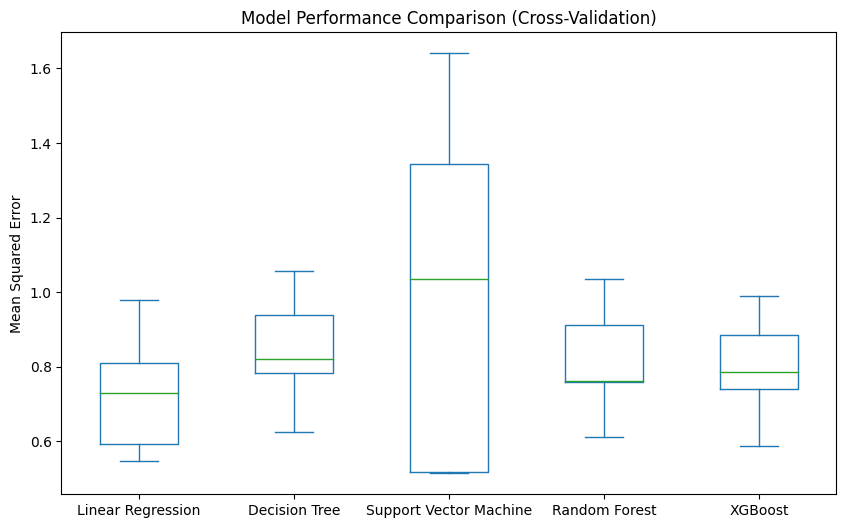

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = {}
for name, model in models.items():
 scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
 cv_results[name] = -scores
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.plot.box(figsize=(10, 6))
plt.title('Model Performance Comparison (Cross-Validation)')
plt.ylabel('Mean Squared Error')
plt.show()

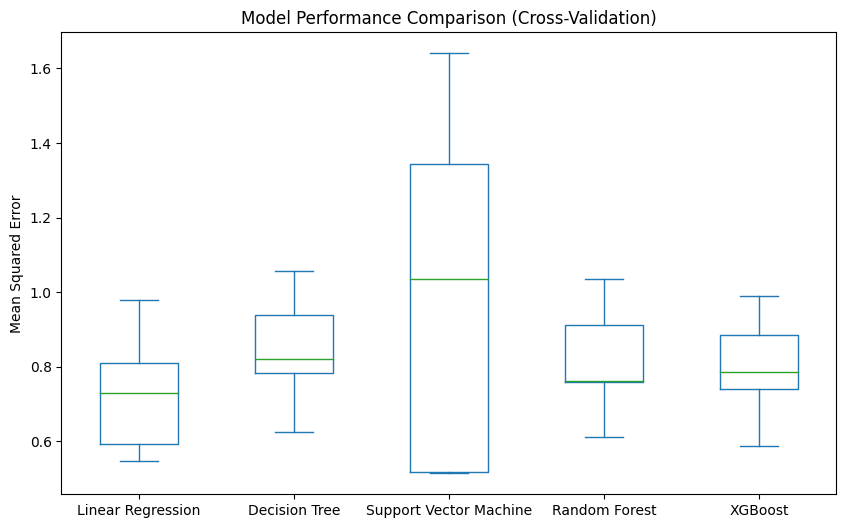

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = {}
for name, model in models.items():
 scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
 cv_results[name] = -scores
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.plot.box(figsize=(10, 6))
plt.title('Model Performance Comparison (Cross-Validation)')
plt.ylabel('Mean Squared Error')
plt.show()

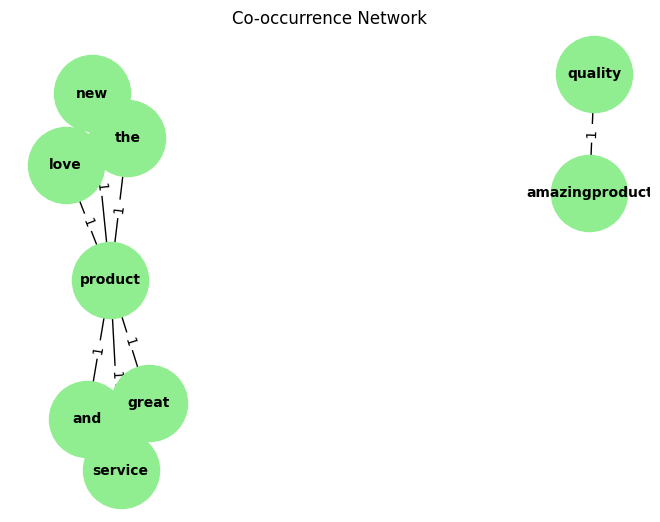

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from networkx import Graph
import networkx as nx
# Example comments
comments = ['Love the new product', 'Great service and product', 'Amazingproduct quality']
# Create a count matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)
terms = vectorizer.get_feature_names_out()
# Create a co-occurrence matrix
co_occurrence = (X.T @ X).toarray()
np.fill_diagonal(co_occurrence, 0)
# Build the network
G = Graph()
for i in range(len(terms)):
 G.add_node(terms[i])
for i in range(len(terms)):
 for j in range(i+1, len(terms)):
  if co_occurrence[i, j] > 0:
     G.add_edge(terms[i], terms[j], weight=co_occurrence[i, j])
# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen',
font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Co-occurrence Network')
plt.show()